In [3]:
from scipy.stats import median_absolute_deviation as MAD
import pandas as pd
from os.path import join
from ast import literal_eval

In [10]:
dirDatasets=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex023_Euclid\datasets'
fileName=r'06_Full_SOMInfo.csv'
idCol='Seq'
specZ='specZ'
photoZ_SED='photoZ_SED'
residSED='resid_SED'
cellIDs={'train':'cellID_TrainSOM','run':'cellID_RunSOM','runBig':'cellID_RunBigSOM'}
quantErr='quantErr'

In [13]:
dataset=pd.read_csv(join(dirDatasets,fileName))
for cellID in cellIDs.values():
    dataset[cellID]=[literal_eval(x) for x in dataset[cellID]]
dataset=dataset.astype({'specZ_outlCoeff': 'float','photoZ_SED_outlCoeff': 'float'})

In [15]:
dataset.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'photoZ_SED', 'Instr', 'specZ', 'Q_f', 'sc_Ksmagap3',
       'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3', 'sc_Vmagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3', 'photoZ_ML',
       'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3', 'w_sc_Ymagap3',
       'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3', 'w_sc_Vmagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM', 'cellID_RunBigSOM',
       'specZ_outlCoeff', 'photoZ_SED_outlCoeff', 'quantErr_outlCoeff',
       'trainMapOccupation'],
      dtype='object')

In [16]:
dataset=dataset.rename(columns={'specZ':'specZ_KB'})

In [37]:
groups=dataset.groupby('cellID_RunSOM')
data=groups['photoZ_SED'].apply(len).rename('occupation_total')
data=pd.concat([data,groups['photoZ_SED'].mean().rename('mean_photoZ_SED')],axis=1,sort=True)
data=pd.concat([data,groups['photoZ_SED'].apply(MAD).rename('NMAD_photoZ_SED')], axis=1,sort=True)

groups=dataset.dropna(subset=['specZ_KB']).groupby('cellID_RunSOM')
data=pd.concat([data,groups['specZ_KB'].apply(len).rename('occupation_specZ')],axis=1,sort=True)
data=pd.concat([data,groups['specZ_KB'].mean().rename('mean_specZ')],axis=1,sort=True)
data=pd.concat([data,groups['specZ_KB'].apply(MAD).rename('NMAD_specZ')],axis=1,sort=True)

In [18]:
data[data['occupation_specZ']>20]

occupation_total  mean_photoZ_SED  NMAD_photoZ_SED  occupation_specZ  \
0  8                420         0.373621         0.103782              22.0   
   9                616         0.299323         0.127504              83.0   
   10               481         0.353850         0.077095              59.0   
   11               428         0.435154         0.043737              83.0   
   12               559         0.390640         0.047443             193.0   
...                 ...              ...              ...               ...   
27 9                408         0.961221         0.850271              55.0   
   11               241         0.976419         0.290590              95.0   
   12               131         1.032595         0.474432              55.0   
   13               584         1.169692         0.366202             109.0   
   14              1008         1.636972         0.196445              32.0   

       mean_specZ  NMAD_specZ  
0  8     0.153967    0.036540  
   9     0.206838    0.048990  
   10    0.254930    0.059079  
   11    0.341094    0.043737  
   12    0.357755    0.030874  
...           ...         ...  
27 9     0.159555    0.034590  
   11    0.810384    0.192436  
   12    0.808016    0.380583  
   13    0.751127    0.208471  
   14    1.257702    0.217201  

[167 rows x 6 columns]

In [39]:
groups=dataset.groupby('cellID_RunBigSOM')
dataBig=groups['photoZ_SED'].apply(len).rename('occupation_total')
dataBig=pd.concat([dataBig,groups['photoZ_SED'].mean().rename('mean_photoZ_SED')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['photoZ_SED'].apply(MAD).rename('NMAD_photoZ_SED')], axis=1,sort=True)

groups=dataset.dropna(subset=['specZ_KB']).groupby('cellID_RunBigSOM')
dataBig=pd.concat([dataBig,groups['specZ_KB'].apply(len).rename('occupation_specZ')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['specZ_KB'].mean().rename('mean_specZ')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['specZ_KB'].apply(MAD).rename('NMAD_specZ')],axis=1,sort=True)

In [35]:
dataBig[dataBig['occupation_specZ']>20]

occupation_total  mean_photoZ_SED  NMAD_photoZ_SED  occupation_specZ  \
0  21                50         0.363820         0.048184              26.0   
   22                43         0.218837         0.127504              28.0   
   23               202         0.328450         0.111195             118.0   
   24               178         0.343854         0.071165             124.0   
   25               704         0.388599         0.117867             498.0   
...                 ...              ...              ...               ...   
63 52               451         0.266860         0.111195             284.0   
   54                82         0.955317         0.100817              31.0   
   55                67         1.097104         0.128986              22.0   
   56               130         0.995838         0.192738              48.0   
   63                62         0.495452         0.076354              24.0   

       mean_specZ  NMAD_specZ  
0  21    0.157219    0.047834  
   22    0.214108    0.065408  
   23    0.327467    0.110454  
   24    0.345827    0.065753  
   25    0.389443    0.133029  
...           ...         ...  
63 52    0.199130    0.080613  
   54    0.850551    0.174799  
   55    0.998099    0.075316  
   56    0.841384    0.095230  
   63    0.178429    0.051016  

[302 rows x 6 columns]

#### For saving spec-z that have 'unreliable' Qf, but good SOM specZ_outlCoeff ###

In [19]:
import matplotlib.pyplot as plt

In [20]:
import numpy as np

In [21]:
def filterSpecZ(dataset,QfCol='Q_f',specZ_outlCoeff='z_spec_outlCoeff_noQF',outlCoefCriteria=1):
    filteredDataset=dataset[((dataset[QfCol]>2) & (dataset[QfCol]<5)) |
                            ((dataset[QfCol]>22) & (dataset[QfCol]<25)) |
                            (dataset[specZ_outlCoeff].abs()<=outlCoefCriteria)]
    #filteredDataset=dataset[dataset[specZ_outlCoeff].abs()<=outlCoefCriteria]
    return filteredDataset

In [24]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='specZ_KB' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)
data=groups[photoZ].apply(len).rename('occupation_total')
data=pd.concat([data,groups[photoZ].mean().rename('mean_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].median().rename('median_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].apply(MAD).rename('NMAD_'+photoZ)], axis=1,sort=True)

groups=filterSpecZ(dataset.dropna(subset=[specZ]),specZ_outlCoeff='specZ_outlCoeff').groupby(cellID)
data=pd.concat([data,groups[specZ].apply(len).rename('occupation_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].median().rename('median_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].mean().rename('mean_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].apply(MAD).rename('NMAD_'+specZ)],axis=1,sort=True)

In [25]:
d=data[data['occupation_'+specZ]>20]
d

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  8                420         0.373621             0.1410         0.103782   
   9                616         0.299323             0.2230         0.127504   
   10               481         0.353850             0.3090         0.077095   
   11               428         0.435154             0.3585         0.043737   
   12               559         0.390640             0.3620         0.047443   
...                 ...              ...                ...              ...   
27 8                579         0.481230             0.1400         0.115643   
   9                408         0.961221             1.0090         0.850271   
   11               241         0.976419             0.9460         0.290590   
   12               131         1.032595             1.1000         0.474432   
   13               584         1.169692             1.1410         0.366202   

       occupation_specZ_KB  median_specZ_KB  mean_specZ_KB  NMAD_specZ_KB  
0  8                  22.0         0.110058       0.153967       0.036540  
   9                  83.0         0.198243       0.206838       0.048990  
   10                 57.0         0.258100       0.250892       0.056191  
   11                 82.0         0.344706       0.340986       0.044913  
   12                193.0         0.359024       0.357755       0.030874  
...                    ...              ...            ...            ...  
27 8                 116.0         0.108506       0.126081       0.030978  
   9                  55.0         0.093000       0.159555       0.034590  
   11                 84.0         0.799649       0.769576       0.225876  
   12                 46.0         0.749783       0.748530       0.345105  
   13                100.0         0.614320       0.713866       0.178426  

[159 rows x 8 columns]

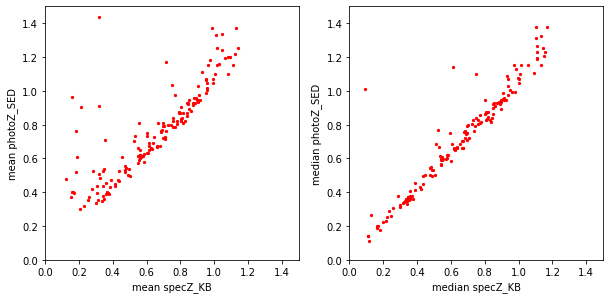

In [26]:
fig, axs=plt.subplots(1,2,figsize=(10,5))
ax=axs[0]
ax.scatter(d['mean_'+specZ],d['mean_'+photoZ],s=5,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('mean '+specZ)
ax.set_ylabel('mean '+photoZ)
ax.set_aspect(1)
ax=axs[1]
ax.scatter(d['median_'+specZ],d['median_'+photoZ],s=5,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('median '+specZ)
ax.set_ylabel('median '+photoZ)
ax.set_aspect(1)

### Checking why some groups have so different mean specZ and photoZ

In [29]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='specZ_KB' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)

In [30]:
d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15]

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  8                420         0.373621             0.1410         0.103782   
   15               398         0.484683             0.3580         0.105265   
   17               362         0.608105             0.5340         0.122314   
   18               585         0.539152             0.4070         0.126021   
1  7                616         0.760857             0.1990         0.151225   
2  8                679         0.525402             0.2880         0.134917   
   19               365         0.700518             0.6830         0.128986   
   24              1111         1.111222             1.0850         0.222390   
3  24               574         1.334282             1.3120         0.199410   
4  23               508         1.183406             1.1525         0.211271   
   24               414         1.329191             1.3220         0.185325   
5  23               464         1.241412             1.2280         0.123056   
6  22               894         1.371690             1.3750         0.146777   
9  13               880         1.373881             1.3780         0.097110   
   18               270         1.254119             1.2650         0.130469   
15 2                675         0.811164             0.7710         0.340998   
   3                370         0.735216             0.6695         0.220166   
18 10               655         1.151850             1.1270         0.103782   
22 3               1137         0.394488             0.1870         0.087473   
23 4               1030         0.404207             0.2675         0.197927   
   5                992         0.509785             0.3375         0.129728   
24 4                475         0.527956             0.3700         0.157156   
25 5               1559         0.522059             0.1750         0.081543   
   9                370         0.906268             0.2300         0.169016   
   11               175         0.907611             0.3800         0.326172   
   13               351         1.434952             1.8290         0.941451   
26 8                300         0.610777             0.1990         0.146777   
   9                426         0.402549             0.1100         0.074130   
   11               117         0.710197             0.3700         0.103782   
27 8                579         0.481230             0.1400         0.115643   
   9                408         0.961221             1.0090         0.850271   
   11               241         0.976419             0.9460         0.290590   
   12               131         1.032595             1.1000         0.474432   
   13               584         1.169692             1.1410         0.366202   

       occupation_specZ_KB  median_specZ_KB  mean_specZ_KB  NMAD_specZ_KB  
0  8                  22.0         0.110058       0.153967       0.036540  
   15                 47.0         0.344559       0.326052       0.047382  
   17                 25.0         0.486738       0.454216       0.091237  
   18                 86.0         0.357690       0.348543       0.062406  
1  7                  29.0         0.165750       0.183077       0.081650  
2  8                  34.0         0.236000       0.281347       0.066272  
   19                 37.0         0.511558       0.527688       0.185263  
   24                189.0         0.930766       0.925086       0.134569  
3  24                 36.0         1.103320       1.047846       0.093434  
4  23                 41.0         0.972777       0.977036       0.115313  
   24                 28.0         1.131860       1.008530       0.058247  
5  23                 42.0         1.111437       1.047160       0.072523  
6  22                 22.0         1.102681       0.987292       0.107744  
9  13                 29.0         1.165883       1.127003       0.064701  
   18                 24.0         1.109487       1.016181       0

In [31]:
badCells=d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15].index

In [33]:
cellCheck=dataset[dataset[cellID]==badCells[-1]][['specZ_KB','photoZ_SED']]
print(cellCheck['specZ_KB'].min(),cellCheck['specZ_KB'].max())

0.22439999878406525 1.288
